In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("dataset.csv") # 620 Records
df2 = pd.read_csv("Crop_recommendation.csv") #2200 Records
df3 = pd.read_csv("Plant_Parameters.csv") #10000 Records


In [4]:
print(df1.head(3))
print(df2.head(3))
print(df3.head(3))

     N   P    K   ph    EC     S     Cu      Fe     Mn     Zn      B  \
0  143  69  217  5.9  0.58  0.23  10.20  116.35  59.96  54.85  21.29   
1  170  36  216  5.9  0.15  0.28  15.69  114.20  56.87  31.28  28.62   
2  158  66  219  6.8  0.34  0.20  15.29   65.87  51.81  57.12  27.59   

         label  
0  pomegranate  
1  pomegranate  
2  pomegranate  
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
         pH   Soil EC  Phosphorus   Potassium       Urea      T.S.P  \
0  6.021428  0.237700   15.987947  133.206193  45.627373  16.952809   
1  6.342420  0.211844   15.305906  137.856536  59.460887  18.378723   
2  6.684784  0.290343   14.778959  132.994257  53.567383  17.207365   

       M.O.P   Moisture  Temperature Plant Type  
0  23.362074  79.234006    52.094083    Carr

In [5]:
print(df1['label'].unique())
print(df2['label'].unique())
print(df3['Plant Type'].unique())

['pomegranate' 'mango' 'grapes' 'mulberry' 'ragi' 'potato']
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
['Carrots' 'Chili' 'Cinnamon' 'Corn' 'Eggplant' 'Rice' 'Strawberries'
 'Sunflowers' 'Tomato' 'Wheat']


In [11]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['N', 'P', 'K', 'ph', 'EC', 'S', 'Cu', 'Fe', 'Mn', 'Zn', 'B', 'label'], dtype='object')
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
Index(['pH', 'Soil EC', 'Phosphorus', 'Potassium', 'Urea', 'T.S.P', 'M.O.P',
       'Moisture', 'Temperature', 'Plant Type'],
      dtype='object')


In [17]:
all_columns =[]
all_columns.extend(list(df1.columns))
all_columns.extend(list(df2.columns))
all_columns.extend(list(df3.columns))
all_columns

['N',
 'P',
 'K',
 'ph',
 'EC',
 'S',
 'Cu',
 'Fe',
 'Mn',
 'Zn',
 'B',
 'label',
 'N',
 'P',
 'K',
 'temperature',
 'humidity',
 'ph',
 'rainfall',
 'label',
 'pH',
 'Soil EC',
 'Phosphorus',
 'Potassium',
 'Urea',
 'T.S.P',
 'M.O.P',
 'Moisture',
 'Temperature',
 'Plant Type']

In [41]:

unique_columns = list(set(all_columns))
unique_columns.remove('label')
unique_columns.remove('Plant Type')
print(*unique_columns,sep=' | ')

Soil EC | P | N | ph | T.S.P | Temperature | S | Mn | K | humidity | Phosphorus | Fe | B | Zn | Moisture | Potassium | temperature | M.O.P | Cu | EC | pH | Urea | rainfall


In [51]:
df3.rename(columns={'Label': 'label'},inplace=True)

In [53]:
df3.rename(columns={'Temperature': 'temperature','pH':'ph','Soil EC':'EC','Potassium':'K','Phosphorus':'P'},inplace=True)

In [54]:
# Concatenate the datasets by rows
combined_df = pd.concat([df1, df2, df3], axis=0, join='outer', ignore_index=True)
combined_df.columns

Index(['N', 'P', 'K', 'ph', 'EC', 'S', 'Cu', 'Fe', 'Mn', 'Zn', 'B', 'label',
       'temperature', 'humidity', 'rainfall', 'Urea', 'T.S.P', 'M.O.P',
       'Moisture'],
      dtype='object')

In [55]:
combined_df.drop(['T.S.P','M.O.P'],axis=1,inplace=True)

In [56]:
combined_df.columns

Index(['N', 'P', 'K', 'ph', 'EC', 'S', 'Cu', 'Fe', 'Mn', 'Zn', 'B', 'label',
       'temperature', 'humidity', 'rainfall', 'Urea', 'Moisture'],
      dtype='object')

In [58]:
# Remove 'Label' column
label_column = combined_df.pop('label')

# Insert 'Label' column at the first position (index 0)

combined_df['Crop'] = label_column
combined_df

N          P           K        ph        EC     S     Cu      Fe  \
0       143.0  69.000000  217.000000  5.900000  0.580000  0.23  10.20  116.35   
1       170.0  36.000000  216.000000  5.900000  0.150000  0.28  15.69  114.20   
2       158.0  66.000000  219.000000  6.800000  0.340000  0.20  15.29   65.87   
3       133.0  45.000000  207.000000  6.400000  0.940000  0.21   8.48  103.10   
4       132.0  48.000000  218.000000  6.700000  0.540000  0.19   5.59   63.40   
...       ...        ...         ...       ...       ...   ...    ...     ...   
102815    NaN  19.708113  280.755698  7.196021  0.276974   NaN    NaN     NaN   
102816    NaN  26.297676  255.078223  6.873112  0.327747   NaN    NaN     NaN   
102817    NaN  20.474570  154.382908  7.105025  0.484937   NaN    NaN     NaN   
102818    NaN  22.757910  249.442899  6.823575  0.372237   NaN    NaN     NaN   
102819    NaN  23.724507  156.422924  6.155405  0.365247   NaN    NaN     NaN   

           Mn     Zn      B  temperature  humidity  rainfall       Urea  \
0       59.96  54.85  21.29          NaN       NaN       NaN        NaN   
1       56.87  31.28  28.62          NaN       NaN       NaN        NaN   
2       51.81  57.12  27.59          NaN       NaN       NaN        NaN   
3       43.81  68.50  47.29          NaN       NaN       NaN        NaN   
4       56.40  46.71  31.04          NaN       NaN       NaN        NaN   
...       ...    ...    ...          ...       ...       ...        ...   
102815    NaN    NaN    NaN    53.184197       NaN       NaN  31.383916   
102816    NaN    NaN    NaN    56.200390       NaN       NaN  35.567096   
102817    NaN    NaN    NaN    69.783946       NaN       NaN  26.809462   
102818    NaN    NaN    NaN    65.488271       NaN       NaN  38.109926   
102819    NaN    NaN    NaN    66.266840       NaN       NaN  34.205366   

         Moisture         Crop  
0             NaN  pomegranate  
1             NaN  pomegranate  
2             NaN  pomegranate  
3             NaN  pomegranate  
4             NaN  pomegranate  
...           ...          ...  
102815  53.337987        Wheat  
102816  58.034545        Wheat  
102817  51.022601        Wheat  
102818  53.746539        Wheat  
102819  56.317684        Wheat  

[102820 rows x 17 columns]

In [59]:
combined_df.describe()

N              P              K             ph  \
count  2820.000000  102820.000000  102820.000000  102820.000000   
mean     69.272695      24.293920     144.065295       6.313736   
std      50.292664      11.181621      49.725040       0.438045   
min       0.000000       5.000000       5.000000       3.504752   
25%      26.000000      16.630257     115.024076       6.031220   
50%      60.000000      23.677300     143.651289       6.288295   
75%     109.000000      30.443757     175.670919       6.572817   
max     198.000000     145.000000     369.000000       9.935091   

                  EC           S          Cu          Fe           Mn  \
count  100620.000000  620.000000  620.000000  620.000000   620.000000   
mean        0.711527    0.484085   17.315452  117.212500   219.905887   
std         0.423364    5.775388    6.441150   62.775199   341.998793   
min         0.010000    0.011100    0.180000    3.810000    20.580000   
25%         0.387511    0.086000   12.592500   68.312500    58.785000   
50%         0.616782    0.168000   16.910000  108.245000    73.580000   
75%         0.919673    0.240000   21.102500  155.620000   163.665000   
max         2.480000  113.200000   35.000000  276.720000  1572.540000   

               Zn           B    temperature     humidity     rainfall  \
count  620.000000  620.000000  102200.000000  2200.000000  2200.000000   
mean    34.340839   28.750710      71.522119    71.481779   103.463655   
std     11.543871   19.636447      11.194105    22.263812    54.958389   
min     17.990000    1.020000       8.825675    14.258040    20.211267   
25%     24.727500   13.442500      66.301711    60.261953    64.551686   
50%     31.425000   23.225000      73.833651    80.473146    94.867624   
75%     43.542500   42.767500      79.562525    89.948771   124.267508   
max     70.000000   74.560000      85.998926    99.981876   298.560117   

                Urea       Moisture  
count  100000.000000  100000.000000  
mean       52.474345      68.513908  
std        20.965486       7.826890  
min        20.000049      50.004516  
25%        34.623409      63.015585  
50%        50.953606      67.986050  
75%        68.084951      74.286058  
max        99.997990      89.999598

In [67]:
# Drop rows with any null values
df_cleaned = combined_df.fillna()
df_cleaned


Empty DataFrame
Columns: [N, P, K, ph, EC, S, Cu, Fe, Mn, Zn, B, temperature, humidity, rainfall, Urea, Moisture, Crop]
Index: []

In [74]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(combined_df.iloc[:,:-1]), columns=['N',
 'P',
 'K',
 'ph',
 'EC',
 'S',
 'Cu',
 'Fe',
 'Mn',
 'Zn',
 'B',
 'temperature',
 'humidity',
 'rainfall',
 'Urea',
 'Moisture'])
df_imputed

c:\Users\jashw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


N          P           K        ph        EC         S  \
0       143.000000  69.000000  217.000000  5.900000  0.580000  0.230000   
1       170.000000  36.000000  216.000000  5.900000  0.150000  0.280000   
2       158.000000  66.000000  219.000000  6.800000  0.340000  0.200000   
3       133.000000  45.000000  207.000000  6.400000  0.940000  0.210000   
4       132.000000  48.000000  218.000000  6.700000  0.540000  0.190000   
...            ...        ...         ...       ...       ...       ...   
102815  391.176658  19.708113  280.755698  7.196021  0.276974  2.520157   
102816  271.252542  26.297676  255.078223  6.873112  0.327747  2.518968   
102817  373.236919  20.474570  154.382908  7.105025  0.484937  2.520923   
102818  334.180922  22.757910  249.442899  6.823575  0.372237  2.519739   
102819  310.118464  23.724507  156.422924  6.155405  0.365247  2.520179   

               Cu          Fe          Mn         Zn          B   temperature  \
0       10.200000  116.350000   59.960000  54.850000  21.290000 -5.251282e+15   
1       15.690000  114.200000   56.870000  31.280000  28.620000 -4.310162e+15   
2       15.290000   65.870000   51.810000  57.120000  27.590000 -6.200222e+15   
3        8.480000  103.100000   43.810000  68.500000  47.290000 -6.201495e+15   
4        5.590000   63.400000   56.400000  46.710000  31.040000 -5.221979e+15   
...           ...         ...         ...        ...        ...           ...   
102815  15.133024  109.541674  122.908404  36.008340  29.634707  5.318420e+01   
102816  15.135198  109.542662  122.908490  36.006446  29.631062  5.620039e+01   
102817  15.134536  109.542413  122.908440  36.007244  29.635133  6.978395e+01   
102818  15.134243  109.542235  122.908449  36.007314  29.633128  6.548827e+01   
102819  15.135533  109.542857  122.908482  36.006354  29.633098  6.626684e+01   

            humidity      rainfall          Urea      Moisture  
0       2.818453e+16 -8.361178e+15  3.227533e+34  7.815404e+32  
1       2.312214e+16 -6.859695e+15  2.647960e+34  6.411980e+32  
2       3.325735e+16 -9.866625e+15  3.808472e+34  9.222136e+32  
3       3.326805e+16 -9.869299e+15  3.809884e+34  9.225556e+32  
4       2.801817e+16 -8.313408e+15  3.208458e+34  7.769214e+32  
...              ...           ...           ...           ...  
102815  1.202967e+02  1.791834e+02  3.138392e+01  5.333799e+01  
102816  7.509343e+01  1.792206e+02  3.556710e+01  5.803455e+01  
102817 -1.935200e+01  1.791878e+02  2.680946e+01  5.102260e+01  
102818  8.015770e+01  1.792007e+02  3.810993e+01  5.374654e+01  
102819 -2.702590e+01  1.792061e+02  3.420537e+01  5.631768e+01  

[102820 rows x 16 columns]

In [78]:
df_imputed['Crop'] = combined_df['Crop']

In [79]:
df_imputed

N          P           K        ph        EC         S  \
0       143.000000  69.000000  217.000000  5.900000  0.580000  0.230000   
1       170.000000  36.000000  216.000000  5.900000  0.150000  0.280000   
2       158.000000  66.000000  219.000000  6.800000  0.340000  0.200000   
3       133.000000  45.000000  207.000000  6.400000  0.940000  0.210000   
4       132.000000  48.000000  218.000000  6.700000  0.540000  0.190000   
...            ...        ...         ...       ...       ...       ...   
102815  391.176658  19.708113  280.755698  7.196021  0.276974  2.520157   
102816  271.252542  26.297676  255.078223  6.873112  0.327747  2.518968   
102817  373.236919  20.474570  154.382908  7.105025  0.484937  2.520923   
102818  334.180922  22.757910  249.442899  6.823575  0.372237  2.519739   
102819  310.118464  23.724507  156.422924  6.155405  0.365247  2.520179   

               Cu          Fe          Mn         Zn          B   temperature  \
0       10.200000  116.350000   59.960000  54.850000  21.290000 -5.251282e+15   
1       15.690000  114.200000   56.870000  31.280000  28.620000 -4.310162e+15   
2       15.290000   65.870000   51.810000  57.120000  27.590000 -6.200222e+15   
3        8.480000  103.100000   43.810000  68.500000  47.290000 -6.201495e+15   
4        5.590000   63.400000   56.400000  46.710000  31.040000 -5.221979e+15   
...           ...         ...         ...        ...        ...           ...   
102815  15.133024  109.541674  122.908404  36.008340  29.634707  5.318420e+01   
102816  15.135198  109.542662  122.908490  36.006446  29.631062  5.620039e+01   
102817  15.134536  109.542413  122.908440  36.007244  29.635133  6.978395e+01   
102818  15.134243  109.542235  122.908449  36.007314  29.633128  6.548827e+01   
102819  15.135533  109.542857  122.908482  36.006354  29.633098  6.626684e+01   

            humidity      rainfall          Urea      Moisture         Crop  
0       2.818453e+16 -8.361178e+15  3.227533e+34  7.815404e+32  pomegranate  
1       2.312214e+16 -6.859695e+15  2.647960e+34  6.411980e+32  pomegranate  
2       3.325735e+16 -9.866625e+15  3.808472e+34  9.222136e+32  pomegranate  
3       3.326805e+16 -9.869299e+15  3.809884e+34  9.225556e+32  pomegranate  
4       2.801817e+16 -8.313408e+15  3.208458e+34  7.769214e+32  pomegranate  
...              ...           ...           ...           ...          ...  
102815  1.202967e+02  1.791834e+02  3.138392e+01  5.333799e+01        Wheat  
102816  7.509343e+01  1.792206e+02  3.556710e+01  5.803455e+01        Wheat  
102817 -1.935200e+01  1.791878e+02  2.680946e+01  5.102260e+01        Wheat  
102818  8.015770e+01  1.792007e+02  3.810993e+01  5.374654e+01        Wheat  
102819 -2.702590e+01  1.792061e+02  3.420537e+01  5.631768e+01        Wheat  

[102820 rows x 17 columns]

In [81]:
from sklearn.impute import KNNImputer

imputer_2 = KNNImputer(n_neighbors=5)
df_imputed_2 = pd.DataFrame(imputer_2.fit_transform(combined_df.iloc[:,:-1]), columns=['N',
 'P',
 'K',
 'ph',
 'EC',
 'S',
 'Cu',
 'Fe',
 'Mn',
 'Zn',
 'B',
 'temperature',
 'humidity',
 'rainfall',
 'Urea',
 'Moisture'])
df_imputed_2['Crop'] = combined_df['Crop']
df_imputed_2

N          P           K        ph        EC         S      Cu  \
0       143.0  69.000000  217.000000  5.900000  0.580000  0.230000  10.200   
1       170.0  36.000000  216.000000  5.900000  0.150000  0.280000  15.690   
2       158.0  66.000000  219.000000  6.800000  0.340000  0.200000  15.290   
3       133.0  45.000000  207.000000  6.400000  0.940000  0.210000   8.480   
4       132.0  48.000000  218.000000  6.700000  0.540000  0.190000   5.590   
...       ...        ...         ...       ...       ...       ...     ...   
102815  146.4  19.708113  280.755698  7.196021  0.276974  0.032648  19.006   
102816  155.6  26.297676  255.078223  6.873112  0.327747  0.109596  22.600   
102817  108.0  20.474570  154.382908  7.105025  0.484937  0.093834  21.800   
102818  155.6  22.757910  249.442899  6.823575  0.372237  0.109596  22.600   
102819  114.8  23.724507  156.422924  6.155405  0.365247  0.091584  22.400   

             Fe       Mn      Zn       B  temperature   humidity   rainfall  \
0       116.350   59.960  54.850  21.290    75.555669  83.635570  80.449447   
1       114.200   56.870  31.280  28.620    59.368216  83.635570  80.449447   
2        65.870   51.810  57.120  27.590    75.362447  83.635570  80.449447   
3       103.100   43.810  68.500  47.290    75.357385  83.635570  80.449447   
4        63.400   56.400  46.710  31.040    57.501314  83.635570  80.449447   
...         ...      ...     ...     ...          ...        ...        ...   
102815  127.358   62.164  24.406   7.208    53.184197  84.873365  77.371639   
102816   40.140  130.238  42.522  16.806    56.200390  82.474510  69.663803   
102817   39.880  168.792  30.408  16.212    69.783946  16.893738  77.493062   
102818   40.140  130.238  42.522  16.806    65.488271  82.474510  69.663803   
102819   39.700  165.104  31.254  16.644    66.266840  16.352812  80.349715   

             Urea   Moisture         Crop  
0       68.617706  62.895737  pomegranate  
1       31.229654  54.166417  pomegranate  
2       73.328878  63.434873  pomegranate  
3       69.994336  63.657647  pomegranate  
4       32.331525  53.985844  pomegranate  
...           ...        ...          ...  
102815  31.383916  53.337987        Wheat  
102816  35.567096  58.034545        Wheat  
102817  26.809462  51.022601        Wheat  
102818  38.109926  53.746539        Wheat  
102819  34.205366  56.317684        Wheat  

[102820 rows x 17 columns]

In [82]:
df_imputed_2.describe()

N              P              K             ph  \
count  102820.000000  102820.000000  102820.000000  102820.000000   
mean      119.388817      24.293920     144.065295       6.313736   
std        31.348398      11.181621      49.725040       0.438045   
min         0.000000       5.000000       5.000000       3.504752   
25%        94.800000      16.630257     115.024076       6.031220   
50%       130.200000      23.677300     143.651289       6.288295   
75%       143.000000      30.443757     175.670919       6.572817   
max       198.000000     145.000000     369.000000       9.935091   

                  EC              S             Cu             Fe  \
count  102820.000000  102820.000000  102820.000000  102820.000000   
mean        0.723287       0.627177      19.916273      85.050077   
std         0.432247       2.918058       4.311595      57.309178   
min         0.010000       0.011100       0.180000       3.810000   
25%         0.390490       0.100046      17.322000      40.240000   
50%         0.625658       0.153428      19.600000      61.644000   
75%         0.934266       0.218958      22.400000     119.884000   
max         2.480000     113.200000      35.000000     276.720000   

                  Mn             Zn              B    temperature  \
count  102820.000000  102820.000000  102820.000000  102820.000000   
mean      294.664190      33.580436      20.497301      71.506212   
std       289.769278       6.227117       5.921373      11.206434   
min        20.580000      17.990000       1.020000       8.825675   
25%       115.282000      29.544000      17.096000      66.280443   
50%       158.390000      33.784000      18.564000      73.844021   
75%       315.874000      37.288000      23.728000      79.542434   
max      1572.540000      70.000000      74.560000      85.998926   

            humidity       rainfall           Urea       Moisture  
count  102820.000000  102820.000000  102820.000000  102820.000000  
mean       49.375775      72.565471      52.145898      68.393672  
std        32.201737      20.474392      20.904404       7.768965  
min        14.258040      20.211267      20.000049      50.004516  
25%        17.417030      70.593075      34.048322      63.067844  
50%        47.247188      77.493062      50.587640      67.745599  
75%        81.827299      79.473017      67.547187      74.094181  
max        99.981876     298.560117      99.997990      89.999598

In [86]:
combined_df.describe()

N              P              K             ph  \
count  2820.000000  102820.000000  102820.000000  102820.000000   
mean     69.272695      24.293920     144.065295       6.313736   
std      50.292664      11.181621      49.725040       0.438045   
min       0.000000       5.000000       5.000000       3.504752   
25%      26.000000      16.630257     115.024076       6.031220   
50%      60.000000      23.677300     143.651289       6.288295   
75%     109.000000      30.443757     175.670919       6.572817   
max     198.000000     145.000000     369.000000       9.935091   

                  EC           S          Cu          Fe           Mn  \
count  100620.000000  620.000000  620.000000  620.000000   620.000000   
mean        0.711527    0.484085   17.315452  117.212500   219.905887   
std         0.423364    5.775388    6.441150   62.775199   341.998793   
min         0.010000    0.011100    0.180000    3.810000    20.580000   
25%         0.387511    0.086000   12.592500   68.312500    58.785000   
50%         0.616782    0.168000   16.910000  108.245000    73.580000   
75%         0.919673    0.240000   21.102500  155.620000   163.665000   
max         2.480000  113.200000   35.000000  276.720000  1572.540000   

               Zn           B    temperature     humidity     rainfall  \
count  620.000000  620.000000  102200.000000  2200.000000  2200.000000   
mean    34.340839   28.750710      71.522119    71.481779   103.463655   
std     11.543871   19.636447      11.194105    22.263812    54.958389   
min     17.990000    1.020000       8.825675    14.258040    20.211267   
25%     24.727500   13.442500      66.301711    60.261953    64.551686   
50%     31.425000   23.225000      73.833651    80.473146    94.867624   
75%     43.542500   42.767500      79.562525    89.948771   124.267508   
max     70.000000   74.560000      85.998926    99.981876   298.560117   

                Urea       Moisture  
count  100000.000000  100000.000000  
mean       52.474345      68.513908  
std        20.965486       7.826890  
min        20.000049      50.004516  
25%        34.623409      63.015585  
50%        50.953606      67.986050  
75%        68.084951      74.286058  
max        99.997990      89.999598

In [87]:
df_imputed.describe()

N              P              K             ph  \
count  102820.000000  102820.000000  102820.000000  102820.000000   
mean      309.676721      24.293920     144.065295       6.313736   
std       158.637106      11.181621      49.725040       0.438045   
min         0.000000       5.000000       5.000000       3.504752   
25%       186.799751      16.630257     115.024076       6.031220   
50%       311.746891      23.677300     143.651289       6.288295   
75%       438.013784      30.443757     175.670919       6.572817   
max       644.394560     145.000000     369.000000       9.935091   

                  EC              S             Cu             Fe  \
count  102820.000000  102820.000000  102820.000000  102820.000000   
mean        0.711709       2.508004      15.148787     109.589160   
std         0.419237       0.475038       0.527501       4.906818   
min         0.010000       0.011100       0.180000       3.810000   
25%         0.391652       2.518720      15.133593     109.541994   
50%         0.622652       2.520117      15.135382     109.542783   
75%         0.915470       2.521715      15.137545     109.543760   
max         2.480000     113.200000      35.000000     276.720000   

                  Mn             Zn              B   temperature  \
count  102820.000000  102820.000000  102820.000000  1.028200e+05   
mean      123.493374      35.996237      29.627893  1.327551e+09   
std        27.577949       0.904930       1.525142  1.423086e+15   
min        20.580000      17.990000       1.020000 -3.364278e+17   
25%       122.908395      36.004564      29.629181  6.621064e+01   
50%       122.908478      36.006464      29.633103  7.383127e+01   
75%       122.908564      36.008137      29.637240  7.959266e+01   
max      1572.540000      70.000000      74.560000  2.553708e+16   

           humidity      rainfall          Urea      Moisture  
count  1.028200e+05  1.028200e+05  1.028200e+05  1.028200e+05  
mean   1.101163e+09  8.419852e+08  5.235687e+18  1.268235e+17  
std    7.637153e+15  2.265390e+15  8.745643e+33  2.117739e+32  
min   -1.369506e+17 -5.355278e+17 -1.568389e+35 -3.797820e+33  
25%   -7.027482e+01  1.791624e+02  3.437387e+01  6.290689e+01  
50%   -3.689779e+01  1.792032e+02  5.103791e+01  6.801687e+01  
75%   -7.740196e+00  1.792409e+02  6.887600e+01  7.453389e+01  
max    1.805589e+18  4.062765e+16  2.067652e+36  5.006777e+34

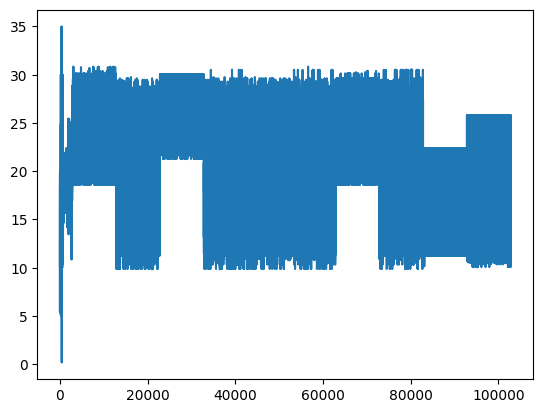

In [89]:
plt.plot(df_imputed_2['Cu'])

In [109]:
temp = df_imputed_2[df_imputed_2['Cu']<10]
print(temp['Crop'].unique())
new_temp = temp[temp['Crop']=='pomegranate']
new_temp.Crop.count()

['pomegranate' 'mango' 'grapes' 'mulberry' 'Chili' 'Corn' 'Eggplant'
 'Rice' 'Sunflowers']


30

In [112]:
temp2  = df_imputed_2[df_imputed_2['Crop'] == 'pomegranate']

temp2.Crop.count()

204

In [114]:
df_imputed_2.columns

Index(['N', 'P', 'K', 'ph', 'EC', 'S', 'Cu', 'Fe', 'Mn', 'Zn', 'B',
       'temperature', 'humidity', 'rainfall', 'Urea', 'Moisture', 'Crop'],
      dtype='object')

In [120]:
print(df_imputed_2.Crop.unique())
len(df_imputed_2.Crop.unique())

['pomegranate' 'mango' 'grapes' 'mulberry' 'ragi' 'potato' 'rice' 'maize'
 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram'
 'lentil' 'banana' 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya'
 'coconut' 'cotton' 'jute' 'coffee' 'Carrots' 'Chili' 'Cinnamon' 'Corn'
 'Eggplant' 'Rice' 'Strawberries' 'Sunflowers' 'Tomato' 'Wheat']


35

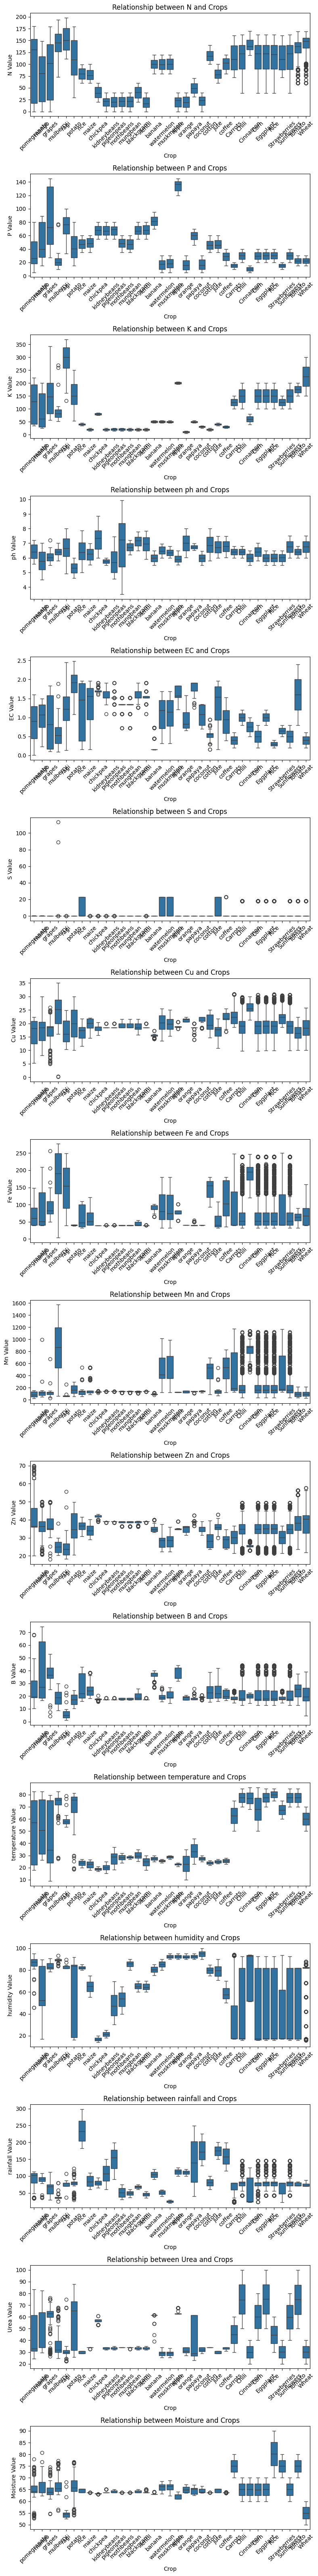

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame structure
# Assuming your DataFrame has crops in 'Crop' column and nutrients like 'Cu', 'Ph', etc.

# List of nutrients you want to explore
nutrients = ['N', 'P', 'K', 'ph', 'EC', 'S', 'Cu', 'Fe', 'Mn', 'Zn', 'B',
       'temperature', 'humidity', 'rainfall', 'Urea', 'Moisture']  # Add your nutrient columns here

# Set up the figure and axes for multiple subplots
fig, axes = plt.subplots(len(nutrients), 1, figsize=(8, 4 * len(nutrients)))

# Loop through each nutrient and plot it against the 'Crop' column
for i, nutrient in enumerate(nutrients):
    sns.boxplot(x='Crop', y=nutrient, data=df_imputed_2, ax=axes[i])
    axes[i].set_title(f'Relationship between {nutrient} and Crops')
    axes[i].set_xlabel('Crop')
    axes[i].set_ylabel(f'{nutrient} Value')

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


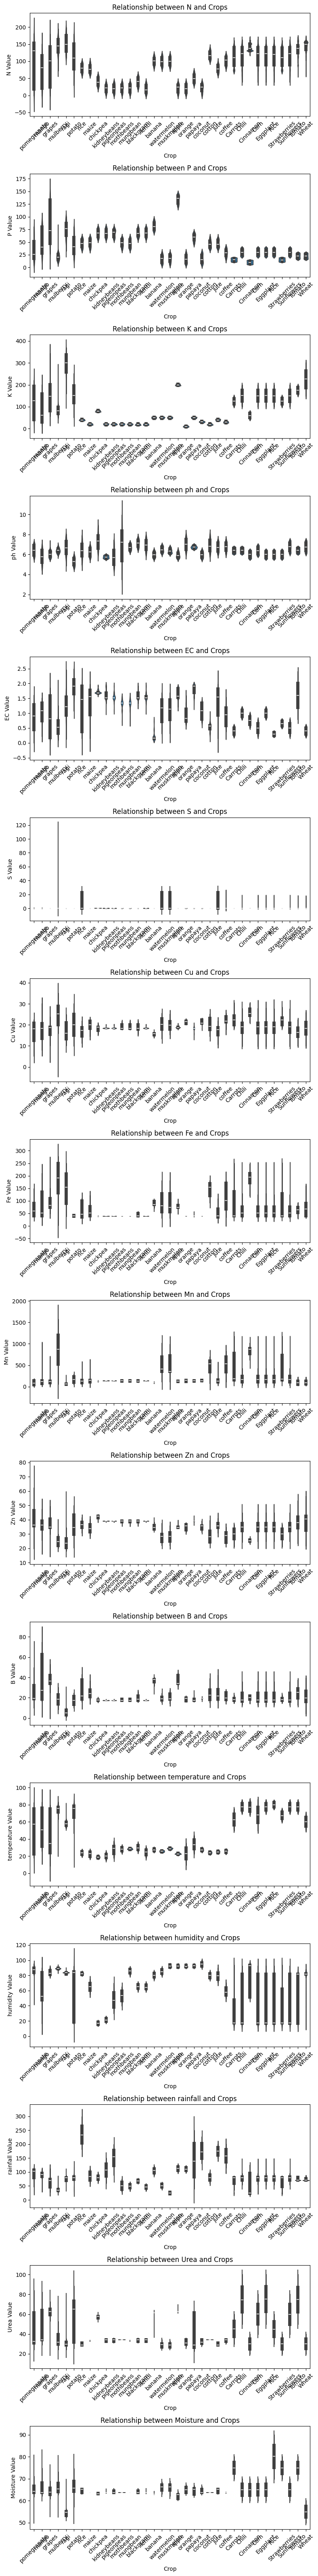

In [125]:
nutrients = ['N', 'P', 'K', 'ph', 'EC', 'S', 'Cu', 'Fe', 'Mn', 'Zn', 'B',
       'temperature', 'humidity', 'rainfall', 'Urea', 'Moisture']  # Add your nutrient columns here

# Set up the figure and axes for multiple subplots
fig, axes = plt.subplots(len(nutrients), 1, figsize=(8, 4 * len(nutrients)))

# Loop through each nutrient and plot it against the 'Crop' column
for i, nutrient in enumerate(nutrients):
    sns.violinplot(x='Crop', y=nutrient, data=df_imputed_2, ax=axes[i])
    axes[i].set_title(f'Relationship between {nutrient} and Crops')
    axes[i].set_xlabel('Crop')
    axes[i].set_ylabel(f'{nutrient} Value')

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [126]:
# Define a function to remove outliers based on IQR for multiple columns
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of columns to remove outliers from
columns_to_filter = ['N', 'P', 'K', 'ph', 'EC', 'S', 'Cu', 'Fe', 'Mn', 'Zn', 'B',
       'temperature', 'humidity', 'rainfall', 'Urea', 'Moisture']  # Example list

# Apply the function to remove outliers
df_filtered = remove_outliers(df_imputed_2, columns_to_filter)

# Show the filtered DataFrame without outliers
print(df_filtered)


            N          P           K        ph        EC         S     Cu  \
1       170.0  36.000000  216.000000  5.900000  0.150000  0.280000  15.69   
63      133.0  32.000000  213.000000  6.300000  0.990000  0.240000  14.59   
65      130.0  11.000000  200.000000  6.000000  0.710000  0.190000  19.34   
357     172.0  27.000000   56.000000  6.600000  0.720000  0.201000  27.18   
519     169.0  35.000000  219.000000  5.700000  0.140000  0.270000  16.21   
...       ...        ...         ...       ...       ...       ...    ...   
102811  154.2  22.467086  239.282928  6.601112  0.471412  0.104902  25.80   
102816  155.6  26.297676  255.078223  6.873112  0.327747  0.109596  22.60   
102817  108.0  20.474570  154.382908  7.105025  0.484937  0.093834  21.80   
102818  155.6  22.757910  249.442899  6.823575  0.372237  0.109596  22.60   
102819  114.8  23.724507  156.422924  6.155405  0.365247  0.091584  22.40   

            Fe       Mn      Zn       B  temperature   humidity   rainfall 

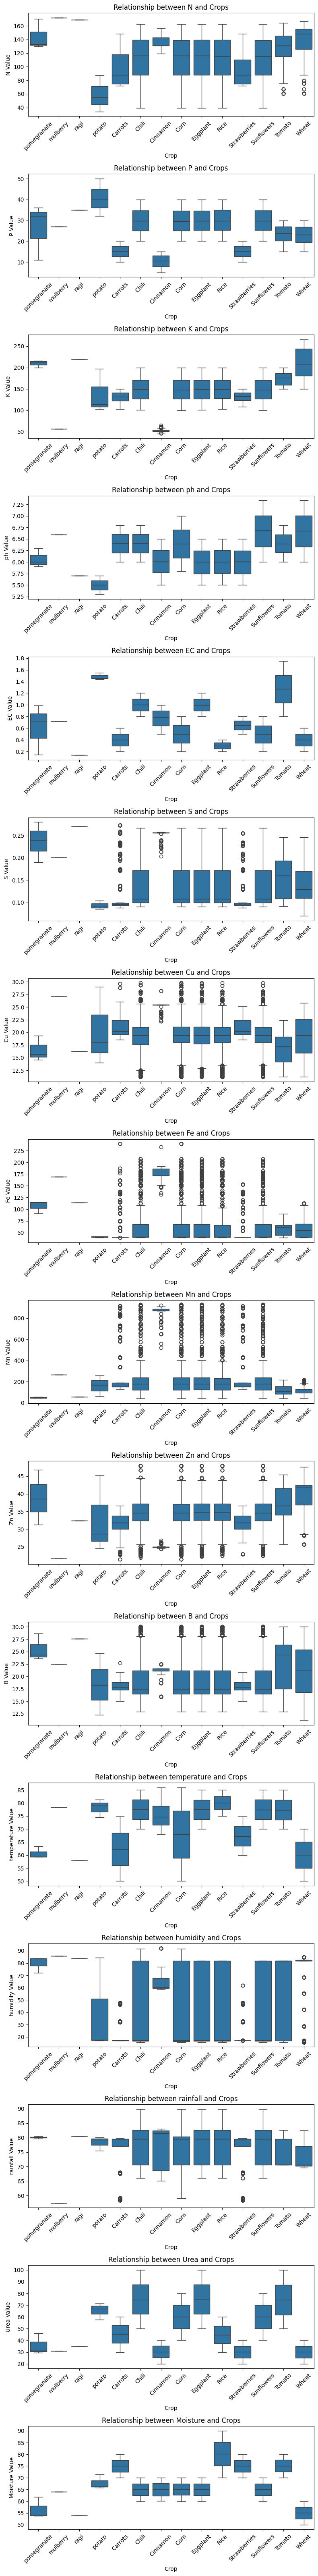

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame structure
# Assuming your DataFrame has crops in 'Crop' column and nutrients like 'Cu', 'Ph', etc.

# List of nutrients you want to explore
nutrients = ['N', 'P', 'K', 'ph', 'EC', 'S', 'Cu', 'Fe', 'Mn', 'Zn', 'B',
       'temperature', 'humidity', 'rainfall', 'Urea', 'Moisture']  # Add your nutrient columns here

# Set up the figure and axes for multiple subplots
fig, axes = plt.subplots(len(nutrients), 1, figsize=(8, 4 * len(nutrients)))

# Loop through each nutrient and plot it against the 'Crop' column
for i, nutrient in enumerate(nutrients):
    sns.boxplot(x='Crop', y=nutrient, data=df_filtered, ax=axes[i])
    axes[i].set_title(f'Relationship between {nutrient} and Crops')
    axes[i].set_xlabel('Crop')
    axes[i].set_ylabel(f'{nutrient} Value')

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [132]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Crop' column has the crop names like 'pomegranate'
le = LabelEncoder()
df_filtered['Crop'] = le.fit_transform(df_filtered['Crop'])  # Converts string labels to numeric
df_imputed_2['Crop'] = le.fit_transform(df_imputed_2['Crop'])  # Converts string labels to numeric


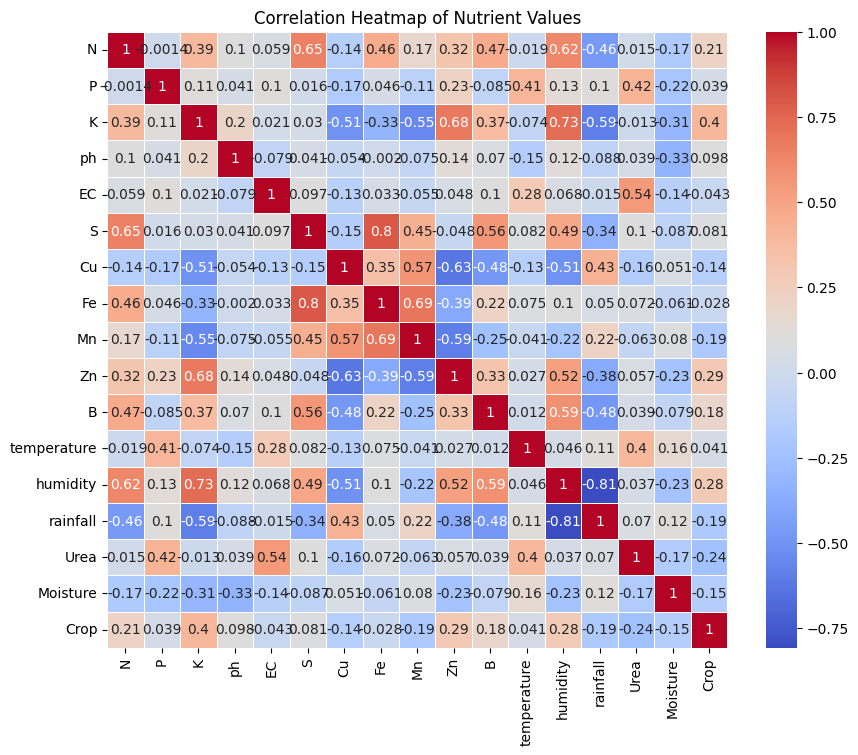

In [131]:

# Calculate the correlation matrix
corr_matrix = df_filtered.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Nutrient Values')
plt.show()


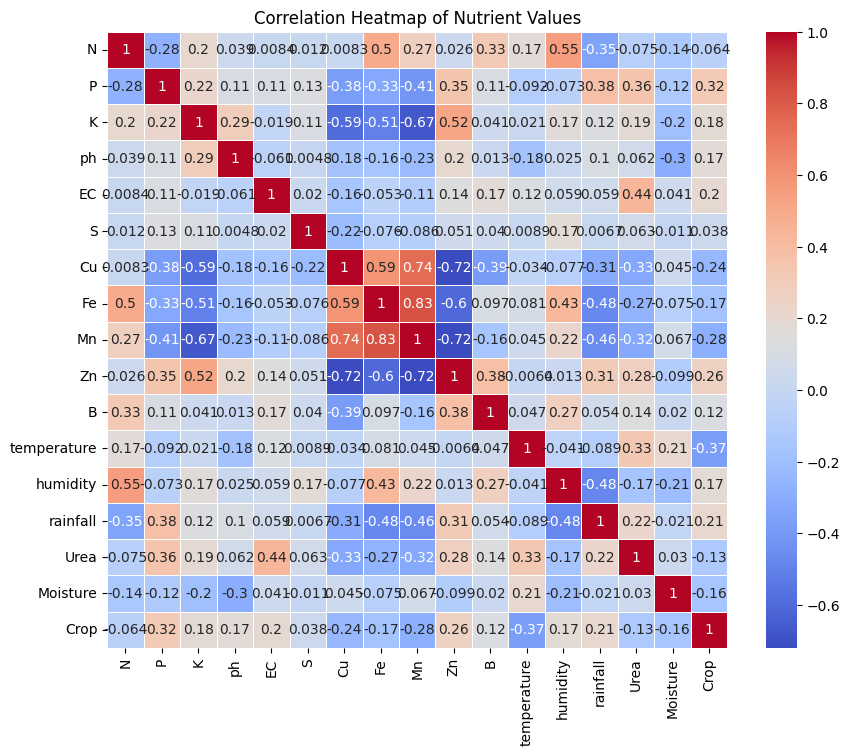

In [133]:

# Calculate the correlation matrix
corr_matrix = df_imputed_2.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Nutrient Values')
plt.show()


In [139]:
df_filtered.to_csv("Filtered data",index=False)
df_imputed_2.to_csv("original data",index=False)

In [138]:
df_imputed_2['Crop'] = combined_df['Crop']
df_filtered['Crop'] = combined_df['Crop']

In [142]:
df_filtered.Crop.unique()

array(['pomegranate', 'mulberry', 'ragi', 'potato', 'Carrots', 'Chili',
       'Cinnamon', 'Corn', 'Eggplant', 'Rice', 'Strawberries',
       'Sunflowers', 'Tomato', 'Wheat'], dtype=object)

In [143]:
df_imputed_2.Crop.unique()


array(['pomegranate', 'mango', 'grapes', 'mulberry', 'ragi', 'potato',
       'rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'banana',
       'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut',
       'cotton', 'jute', 'coffee', 'Carrots', 'Chili', 'Cinnamon', 'Corn',
       'Eggplant', 'Rice', 'Strawberries', 'Sunflowers', 'Tomato',
       'Wheat'], dtype=object)